In [1]:
import requests
from json import dumps,loads
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ENDPOINT = "https://api.coronavirus.data.gov.uk/v1/data?"

In [3]:
# Defining a function for retrieving data.

def get_API_data(filters, structure):

  param_filter = 'filters='+';'.join([f"{key}={value}" for key, value in filters.items()])+'&'
  param_structure = 'structure='+dumps(structure, ensure_ascii=False)
  full_url = f"{ENDPOINT}{param_filter}" + param_structure

  try:
      # Make the API request
      response_api = requests.get(full_url)

      # Check if the request was successful (status code 200)
      if response_api.status_code == 200:
          # Parse and return the JSON response_api
          return response_api.json()
      else:
          # Print an error message if the request was unsuccessful
          print(f"Error: Unable to fetch data. Status Code: {response_api.status_code}")
          return None

  except requests.RequestException as e:
      # Print an error message if an exception occurs during the request
      print(f"Error: {e}")
      return None

In [4]:
'''
Defining a structure 'filter_london' to fetch London's details as it was NULL in 'data_filter_regional' 
and 'data_filter_national'. So, I modified to include London's data in this manner.
'''

data_filter_national = {
    'areaType': 'nation'
    }

data_filter_regional = {
    'areaType': 'region'
}
filter_london= {
    'areaType': 'region;',
    'areaName': 'London'
}
structure = {
    "date": "date",
    "areaName": "areaName",
    "dailyCases": "newCasesByPublishDate",
    "cumulativeCases": "cumCasesByPublishDate",
    "dailyDeaths" : "newDeaths28DaysByPublishDate",
    "cumulativeDeaths": "cumDeaths28DaysByPublishDate",
    "cumulative_vaccinated" : "cumPeopleVaccinatedSecondDoseByVaccinationDate",
    "vaccination_age":"vaccinationsAgeDemographics"
    }

In [5]:
results_json_national = get_API_data(data_filter_national, structure)
results_json_regional = get_API_data(data_filter_regional, structure)
results_json_london= get_API_data(filter_london, structure)

In [6]:
results_json_national_data = results_json_national['data']
results_json_regional_data = results_json_regional['data']
results_json_london_data  = results_json_london['data']

In [7]:

data = results_json_national_data + results_json_regional_data + results_json_london_data
len(data)

9660

In [8]:
data[1]

{'date': '2023-12-13',
 'areaName': 'England',
 'dailyCases': 0,
 'cumulativeCases': 21017576,
 'dailyDeaths': None,
 'cumulativeDeaths': None,
 'cumulative_vaccinated': 41773077,
 'vaccination_age': [{'age': '05_11',
   'VaccineRegisterPopulationByVaccinationDate': 5118484.0,
   'cumPeopleVaccinatedAutumn22ByVaccinationDate': None,
   'cumPeopleVaccinatedAutumn23ByVaccinationDate': None,
   'cumPeopleVaccinatedCompleteByVaccinationDate': 319838.0,
   'cumPeopleVaccinatedSpring22ByVaccinationDate': None,
   'cumPeopleVaccinatedSpring23ByVaccinationDate': None,
   'newPeopleVaccinatedAutumn22ByVaccinationDate': None,
   'newPeopleVaccinatedAutumn23ByVaccinationDate': None,
   'newPeopleVaccinatedCompleteByVaccinationDate': 0.0,
   'newPeopleVaccinatedSpring22ByVaccinationDate': None,
   'newPeopleVaccinatedSpring23ByVaccinationDate': None,
   'cumPeopleVaccinatedFirstDoseByVaccinationDate': 477073.0,
   'newPeopleVaccinatedFirstDoseByVaccinationDate': 0.0,
   'cumPeopleVaccinatedSecondD

In [9]:
covid_data = pd.DataFrame(data)

In [10]:
covid_data.head(10)

,date,areaName,dailyCases,cumulativeCases,dailyDeaths,cumulativeDeaths,cumulative_vaccinated,vaccination_age
0,2023-12-14,England,6065.0,21023641.0,NaN,NaN,NaN,[]
1,2023-12-13,England,0.0,21017576.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
2,2023-12-12,England,0.0,21017576.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3,2023-12-11,England,0.0,21017576.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
4,2023-12-10,England,0.0,21017576.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
5,2023-12-09,England,0.0,21017576.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
6,2023-12-08,England,0.0,21017576.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
7,2023-12-07,England,5778.0,21017576.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
8,2023-12-06,England,0.0,21011798.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
9,2023-12-05,England,0.0,21011798.0,NaN,NaN,41773077.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."


In [11]:

covid_data = covid_data.drop(covid_data[covid_data['areaName'] == 'England'].index)

In [12]:
covid_data = covid_data.reset_index(drop=True)

In [13]:
covid_data.head(5)

,date,areaName,dailyCases,cumulativeCases,dailyDeaths,cumulativeDeaths,cumulative_vaccinated,vaccination_age
0,2023-06-29,Northern Ireland,NaN,NaN,NaN,NaN,1325352.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1,2023-06-28,Northern Ireland,NaN,NaN,NaN,NaN,1325352.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
2,2023-06-27,Northern Ireland,NaN,NaN,NaN,NaN,1325351.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
3,2023-06-26,Northern Ireland,NaN,NaN,NaN,NaN,1325350.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
4,2023-06-25,Northern Ireland,NaN,NaN,NaN,NaN,1325350.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."


In [14]:

covid_data= covid_data.rename(columns={'areaName': 'area'})

In [15]:
covid_data.head(3)

,date,area,dailyCases,cumulativeCases,dailyDeaths,cumulativeDeaths,cumulative_vaccinated,vaccination_age
0,2023-06-29,Northern Ireland,NaN,NaN,NaN,NaN,1325352.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1,2023-06-28,Northern Ireland,NaN,NaN,NaN,NaN,1325352.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
2,2023-06-27,Northern Ireland,NaN,NaN,NaN,NaN,1325351.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."


In [16]:

# checking data types of each column
print(covid_data.dtypes)

date                      object
area                      object
dailyCases               float64
cumulativeCases          float64
dailyDeaths              float64
cumulativeDeaths         float64
cumulative_vaccinated    float64
vaccination_age           object
dtype: object


In [17]:
# Convert the 'date' column to datetime type
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [18]:
# confirming data types of each column
print(covid_data.dtypes)

date                     datetime64[ns]
area                             object
dailyCases                      float64
cumulativeCases                 float64
dailyDeaths                     float64
cumulativeDeaths                float64
cumulative_vaccinated           float64
vaccination_age                  object
dtype: object


In [19]:

covid_data.head(5)

,date,area,dailyCases,cumulativeCases,dailyDeaths,cumulativeDeaths,cumulative_vaccinated,vaccination_age
0,2023-06-29,Northern Ireland,NaN,NaN,NaN,NaN,1325352.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
1,2023-06-28,Northern Ireland,NaN,NaN,NaN,NaN,1325352.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
2,2023-06-27,Northern Ireland,NaN,NaN,NaN,NaN,1325351.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
3,2023-06-26,Northern Ireland,NaN,NaN,NaN,NaN,1325350.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."
4,2023-06-25,Northern Ireland,NaN,NaN,NaN,NaN,1325350.0,"[{'age': '50+', 'cumPeopleVaccinatedAutumn22By..."


In [20]:
# Display a summary of the DataFrame
print("DataFrame Summary:")
covid_data_info = covid_data.info()

# Count the number of missing values in each column
missing_data = covid_data.isnull().values.any().sum()

# Display the count of missing values
print("\nMissing Data:")
print(missing_data)

DataFrame Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8246 entries, 0 to 8245
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   8246 non-null   datetime64[ns]
 1   area                   8246 non-null   object        
 2   dailyCases             7841 non-null   float64       
 3   cumulativeCases        7840 non-null   float64       
 4   dailyDeaths            6105 non-null   float64       
 5   cumulativeDeaths       6107 non-null   float64       
 6   cumulative_vaccinated  6226 non-null   float64       
 7   vaccination_age        8246 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 515.5+ KB

Missing Data:
1


In [21]:

covid_data_sorted = covid_data.sort_values(by=['area', 'date'], ascending=[True, False])

In [22]:
covid_data_sorted['cumulative_Deaths'] = covid_data_sorted.groupby('area')['cumulativeDeaths'].fillna(method='bfill')
covid_data_sorted['cumulative_Cases'] = covid_data_sorted.groupby('area')['cumulativeCases'].fillna(method='bfill')
covid_data_sorted['cumulative_vaccinated_new'] = covid_data_sorted.groupby('area')['cumulative_vaccinated'].fillna(method='bfill')

In [23]:
covid_data = covid_data_sorted

In [24]:

covid_data.head(5)

,date,area,dailyCases,cumulativeCases,dailyDeaths,cumulativeDeaths,cumulative_vaccinated,vaccination_age,cumulative_Deaths,cumulative_Cases,cumulative_vaccinated_new
6909,2023-12-14,London,0.0,3181347.0,NaN,NaN,NaN,[],23448.0,3181347.0,6028037.0
6910,2023-12-13,London,216.0,3181347.0,NaN,NaN,6028037.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23448.0,3181347.0,6028037.0
6911,2023-12-12,London,197.0,3181131.0,NaN,NaN,6028037.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23448.0,3181131.0,6028037.0
6912,2023-12-11,London,148.0,3180934.0,NaN,NaN,6028037.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23448.0,3180934.0,6028037.0
6913,2023-12-10,London,164.0,3180786.0,NaN,NaN,6028037.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23448.0,3180786.0,6028037.0


In [25]:
columns_to_remove = ['cumulativeDeaths', 'cumulativeCases','cumulative_vaccinated']
covid_data = covid_data.drop(columns=columns_to_remove)

In [26]:
covid_data.dropna(inplace=True)

In [27]:
# Reset the index
covid_data = covid_data.reset_index(drop=True)

In [28]:
covid_data.head(5)

,date,area,dailyCases,dailyDeaths,vaccination_age,cumulative_Deaths,cumulative_Cases,cumulative_vaccinated_new
0,2023-07-06,London,39.0,12.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23448.0,3160897.0,6028037.0
1,2023-07-05,London,36.0,0.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23436.0,3160858.0,6028036.0
2,2023-07-04,London,28.0,0.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23436.0,3160822.0,6028036.0
3,2023-07-03,London,35.0,0.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23436.0,3160794.0,6028036.0
4,2023-07-02,London,40.0,0.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",23436.0,3160759.0,6028036.0


In [29]:

df = covid_data.sort_values(by=['area', 'date'])

# Calculate the 7-day rolling average for daily cases and daily deaths
df['daily_cases_roll_avg'] = df.groupby('area')['dailyCases'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)
df['daily_deaths_roll_avg'] = df.groupby('area')['dailyDeaths'].rolling(window=7, min_periods=1).mean().reset_index(level=0, drop=True)
df.reset_index(drop=True, inplace=True)

In [30]:
df.head(5)

,date,area,dailyCases,dailyDeaths,vaccination_age,cumulative_Deaths,cumulative_Cases,cumulative_vaccinated_new,daily_cases_roll_avg,daily_deaths_roll_avg
0,2020-12-08,London,2203.0,32.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7287.0,181345.0,1535.0,2203.000000,32.000000
1,2020-12-09,London,2550.0,35.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7322.0,183895.0,1549.0,2376.500000,33.500000
2,2020-12-10,London,4144.0,40.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7362.0,188039.0,1560.0,2965.666667,35.666667
3,2020-12-11,London,4755.0,34.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7396.0,192794.0,1560.0,3413.000000,35.250000
4,2020-12-12,London,4283.0,28.0,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7424.0,197077.0,1562.0,3587.000000,33.800000


In [31]:

columns_to_remove = ['dailyDeaths','dailyCases']
df = df.drop(columns=columns_to_remove)

In [32]:
covid_data = df

In [33]:
covid_data.head(5)

,date,area,vaccination_age,cumulative_Deaths,cumulative_Cases,cumulative_vaccinated_new,daily_cases_roll_avg,daily_deaths_roll_avg
0,2020-12-08,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7287.0,181345.0,1535.0,2203.000000,32.000000
1,2020-12-09,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7322.0,183895.0,1549.0,2376.500000,33.500000
2,2020-12-10,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7362.0,188039.0,1560.0,2965.666667,35.666667
3,2020-12-11,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7396.0,192794.0,1560.0,3413.000000,35.250000
4,2020-12-12,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy...",7424.0,197077.0,1562.0,3587.000000,33.800000


In [34]:

# Create a new DataFrame with 'date', 'area', and 'vaccination_age' columns
covid_data_vaccinations = pd.DataFrame(covid_data[['date', 'area', 'vaccination_age']])

# Drop the 'vaccination_age' column from the original DataFrame
covid_data.drop(columns='vaccination_age', inplace=True)

In [35]:
# Print the new DataFrame with vaccination data
covid_data_vaccinations.head(5)

,date,area,vaccination_age
0,2020-12-08,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
1,2020-12-09,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
2,2020-12-10,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
3,2020-12-11,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."
4,2020-12-12,London,"[{'age': '05_11', 'VaccineRegisterPopulationBy..."


In [36]:
# Print the original DataFrame after dropping 'vaccination_age' column
covid_data.head(5)

,date,area,cumulative_Deaths,cumulative_Cases,cumulative_vaccinated_new,daily_cases_roll_avg,daily_deaths_roll_avg
0,2020-12-08,London,7287.0,181345.0,1535.0,2203.000000,32.000000
1,2020-12-09,London,7322.0,183895.0,1549.0,2376.500000,33.500000
2,2020-12-10,London,7362.0,188039.0,1560.0,2965.666667,35.666667
3,2020-12-11,London,7396.0,192794.0,1560.0,3413.000000,35.250000
4,2020-12-12,London,7424.0,197077.0,1562.0,3587.000000,33.800000


In [37]:

modified_data_columns = [
    'date',
    'area',
    'age',
    'VaccineRegisterPopulationByVaccinationDate',
    'cumPeopleVaccinatedCompleteByVaccinationDate',
    'newPeopleVaccinatedCompleteByVaccinationDate',
    'cumPeopleVaccinatedFirstDoseByVaccinationDate',
    'newPeopleVaccinatedFirstDoseByVaccinationDate',
    'cumPeopleVaccinatedSecondDoseByVaccinationDate',
    'newPeopleVaccinatedSecondDoseByVaccinationDate',
    'cumVaccinationFirstDoseUptakeByVaccinationDatePercentage',
    'cumVaccinationCompleteCoverageByVaccinationDatePercentage',
    'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage',
    ]

modified_data = pd.DataFrame(columns=modified_data_columns)
modified_data.head()

,date,area,age,VaccineRegisterPopulationByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage


In [38]:
# traversing through each data row
for index,row in covid_data_vaccinations.iterrows():
  data_vaccine_row = pd.json_normalize(row['vaccination_age'])
  for _,r in data_vaccine_row.iterrows():
    if not pd.isna(r['age']):
      new_row = {
      'date': row['date'],
      'area': row['area'],
      'age': r.get('age', None),
      'VaccineRegisterPopulationByVaccinationDate': r.get('VaccineRegisterPopulationByVaccinationDate', None),
      'cumPeopleVaccinatedCompleteByVaccinationDate': r.get('cumPeopleVaccinatedCompleteByVaccinationDate', None),
      'newPeopleVaccinatedCompleteByVaccinationDate': r.get('newPeopleVaccinatedCompleteByVaccinationDate', None),
      'cumPeopleVaccinatedFirstDoseByVaccinationDate': r.get('cumPeopleVaccinatedFirstDoseByVaccinationDate', None),
      'newPeopleVaccinatedFirstDoseByVaccinationDate': r.get('newPeopleVaccinatedFirstDoseByVaccinationDate', None),
      'cumPeopleVaccinatedSecondDoseByVaccinationDate': r.get('cumPeopleVaccinatedSecondDoseByVaccinationDate', None),
      'newPeopleVaccinatedSecondDoseByVaccinationDate': r.get('newPeopleVaccinatedSecondDoseByVaccinationDate', None),
      'cumVaccinationFirstDoseUptakeByVaccinationDatePercentage': r.get('cumVaccinationFirstDoseUptakeByVaccinationDatePercentage', None),
      'cumVaccinationCompleteCoverageByVaccinationDatePercentage': r.get('cumVaccinationCompleteCoverageByVaccinationDatePercentage', None),
      'cumVaccinationSecondDoseUptakeByVaccinationDatePercentage': r.get('cumVaccinationSecondDoseUptakeByVaccinationDatePercentage', None),

      }
      modified_data.loc[len(modified_data)]= new_row

In [39]:
covid_data_vaccinations_wide = modified_data

In [40]:
covid_data_vaccinations_wide.head(5)

,date,area,age,VaccineRegisterPopulationByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationCompleteCoverageByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage
0,2020-12-08,London,05_11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-12-08,London,12_15,489117.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-08,London,16_17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-08,London,18_24,960087.0,52.0,1.0,117.0,1.0,52.0,1.0,0.0,0.0,0.0
4,2020-12-08,London,25_29,1033707.0,176.0,2.0,266.0,28.0,176.0,2.0,0.0,0.0,0.0


In [41]:

# 1.  Aggregating data into intermediate data : for London
# Filter data for London
london_data = covid_data[covid_data['area'] == 'London']

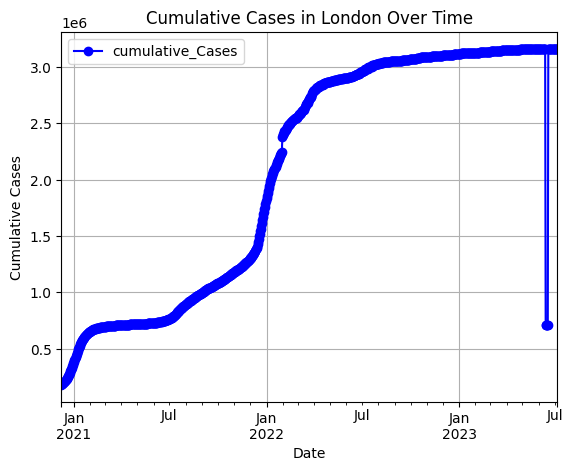

In [42]:
# 2. # Plotting cumulative cases over time

london_data.plot(x='date', y='cumulative_Cases', marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Cumulative Cases in London Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

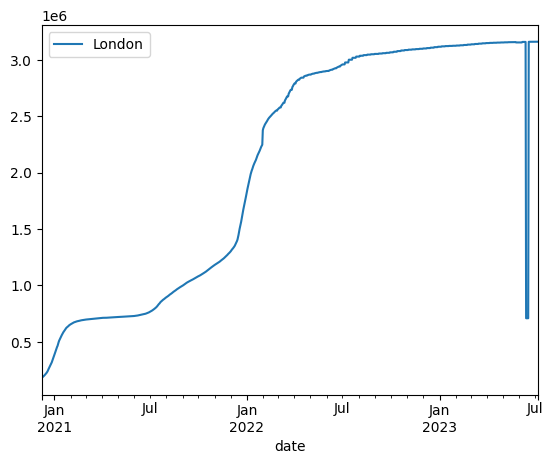

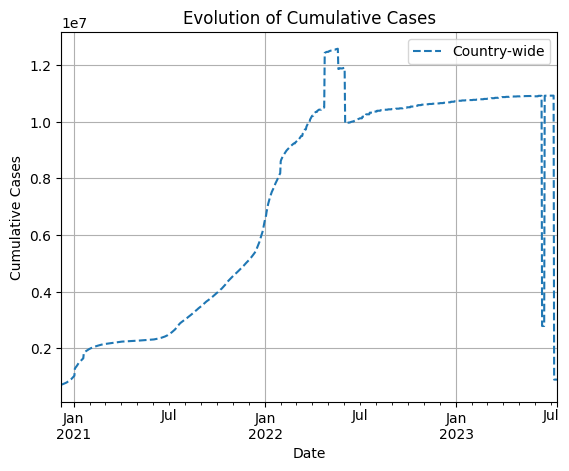

In [43]:

# 1. Intermediate data : Calculating cumulative cases over time for the entire country
country_data = covid_data.groupby('date')['cumulative_Cases'].sum().reset_index()

# 2. Plotting the graph over intermediate data Entire country & London to compare data
plt.figure(figsize=(10, 6))

# Plot London data
london_data.plot(x='date', y='cumulative_Cases', label='London')

# Plot country-wide data
country_data.plot(x='date', y='cumulative_Cases', label='Country-wide', linestyle='dashed')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Evolution of Cumulative Cases')
plt.legend()
plt.grid(True)
plt.show()

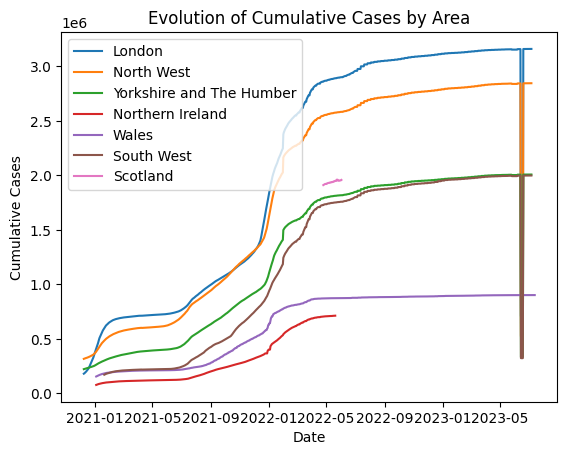

In [44]:

#1. Intermediate Data :  Calculating cumulative cases over time for each area
cumulative_data = df.groupby(['date', 'area'])['cumulative_Cases'].sum().reset_index()

# 2.Group by 'area' and plot each group on the same graph
# Iterate through unique areas and plot each one
for area in cumulative_data['area'].unique():
    area_data = cumulative_data[cumulative_data['area'] == area]
    plt.plot(area_data['date'], area_data['cumulative_Cases'], label=area)

plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Evolution of Cumulative Cases by Area')
plt.legend()
plt.show()

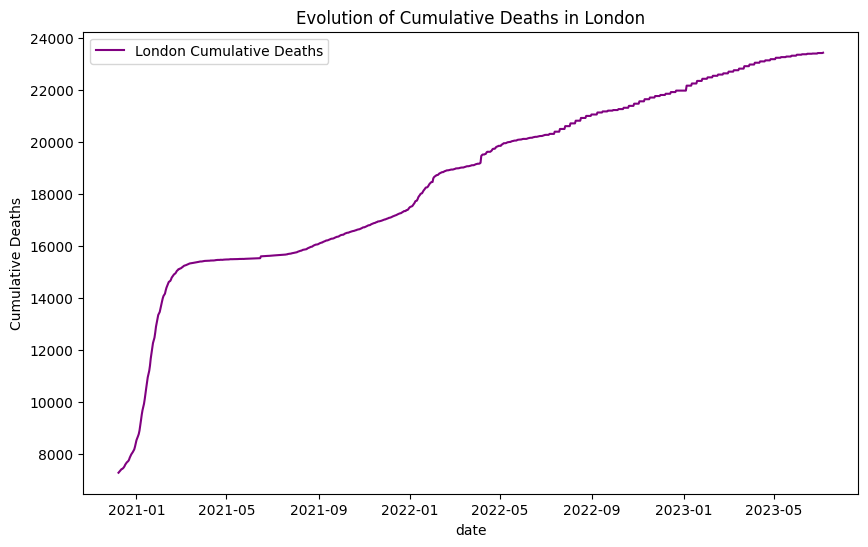

In [45]:

# 1. Intermediate Data : Filter data for London
london_data = covid_data[covid_data['area'] == 'London']

# 2. Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(london_data['date'], london_data['cumulative_Deaths'], label='London Cumulative Deaths', color='purple')
plt.xlabel('date')
plt.ylabel('Cumulative Deaths')
plt.title('Evolution of Cumulative Deaths in London')
plt.legend()
plt.show()

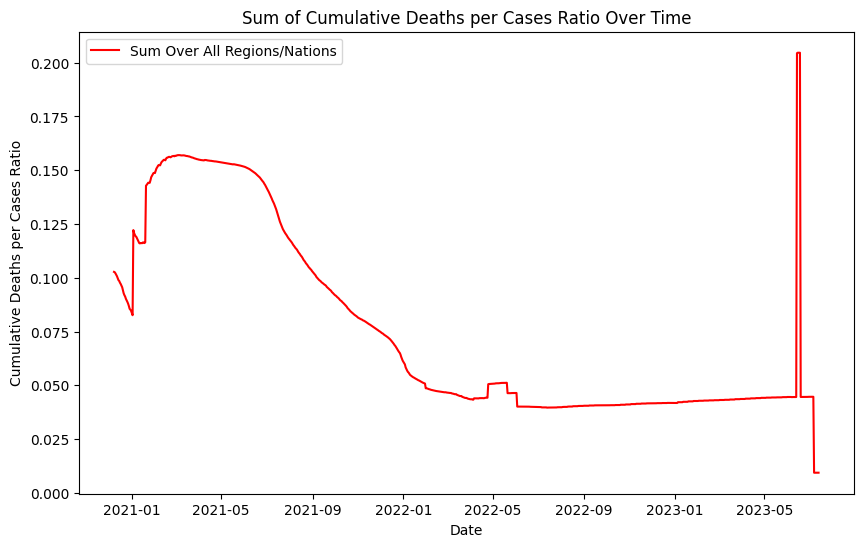

In [46]:

# 1. Intermediate Data : Calculate cumulative deaths per cases ratio
covid_data['Cumulative_Deaths_Per_Cases'] = covid_data['cumulative_Deaths'] / covid_data['cumulative_Cases']

# Calculate sum over all regions/nations as a function of time
cumulative_ratio_data = df.groupby('date')['Cumulative_Deaths_Per_Cases'].sum().reset_index()

# 2. Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_ratio_data['date'], cumulative_ratio_data['Cumulative_Deaths_Per_Cases'], label='Sum Over All Regions/Nations', color='red')
plt.xlabel('Date')
plt.ylabel('Cumulative Deaths per Cases Ratio')
plt.title('Sum of Cumulative Deaths per Cases Ratio Over Time')
plt.legend()
plt.show()

In [47]:

#Calculating sum of cumulative vaccinations over all areas as a function of time
cumulative_vaccinations_data = covid_data_vaccinations_wide.groupby('date')['cumPeopleVaccinatedCompleteByVaccinationDate'].sum().reset_index()

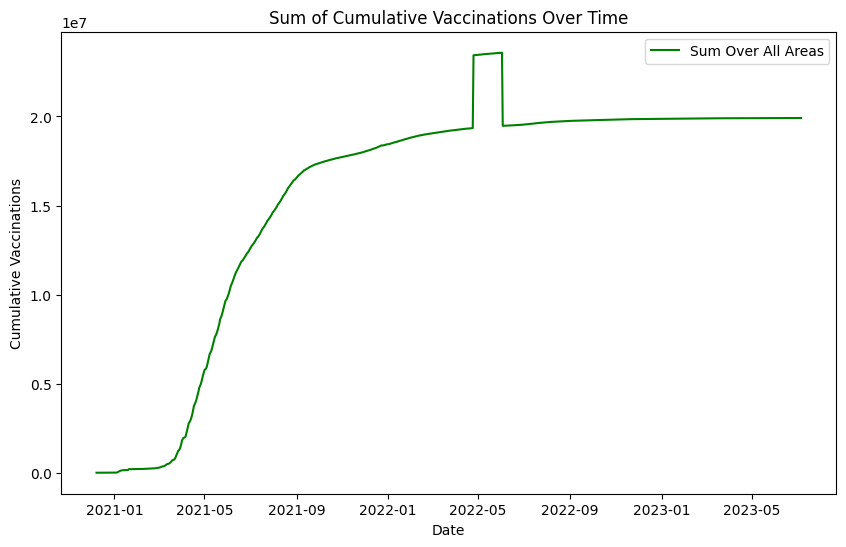

In [48]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_vaccinations_data['date'], cumulative_vaccinations_data['cumPeopleVaccinatedCompleteByVaccinationDate'], label='Sum Over All Areas', color='green')
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.title('Sum of Cumulative Vaccinations Over Time')
plt.legend()
plt.show()

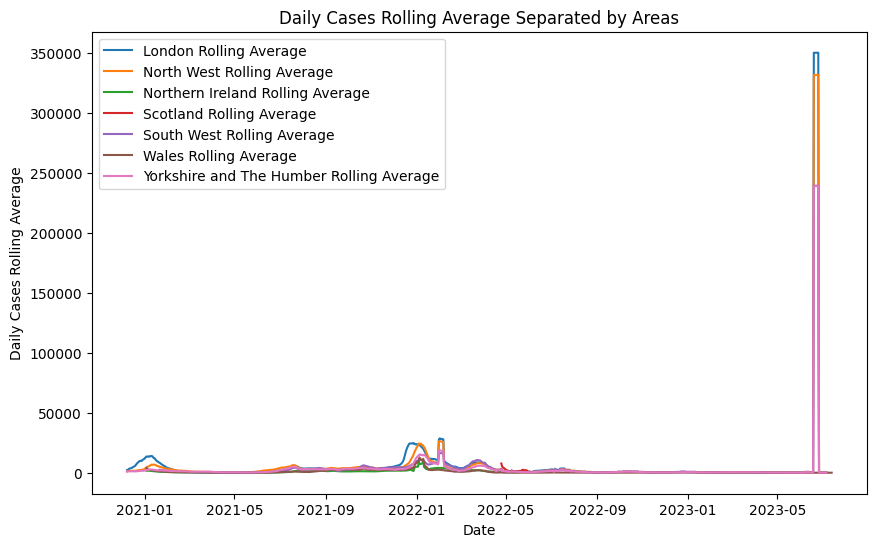

In [49]:

# Plotting the graph
plt.figure(figsize=(10, 6))

# Iterate through unique areas and plot each rolling average
for area in covid_data['area'].unique():
    area_data = covid_data[df['area'] == area]
    plt.plot(area_data['date'], area_data['daily_cases_roll_avg'], label=f'{area} Rolling Average')

plt.xlabel('Date')
plt.ylabel('Daily Cases Rolling Average')
plt.title('Daily Cases Rolling Average Separated by Areas')
plt.legend()
plt.show()

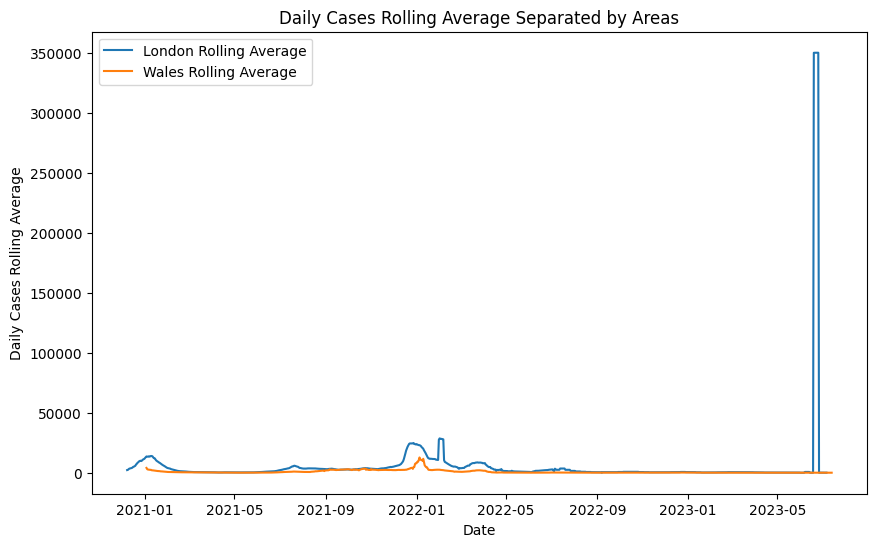

In [50]:

# Plotting
plt.figure(figsize=(10, 6))
cities = ['London', 'Wales']
# Iterate through unique areas and plot each rolling average
for area in cities:
    area_data = covid_data[df['area'] == area]
    plt.plot(area_data['date'], area_data['daily_cases_roll_avg'], label=f'{area} Rolling Average')

plt.xlabel('Date')
plt.ylabel('Daily Cases Rolling Average')
plt.title('Daily Cases Rolling Average Separated by Areas')
plt.legend()
plt.show()

In [51]:

# Normalize the rolling averages
max_cases = covid_data['daily_cases_roll_avg'].max()
max_deaths = covid_data['daily_deaths_roll_avg'].max()
covid_data['daily_cases_roll_avg_norm'] = covid_data['daily_cases_roll_avg'] /max_cases
covid_data['daily_deaths_roll_avg_norm'] = covid_data['daily_deaths_roll_avg'] /max_deaths 

# Sum the normalized rolling average of cases over all areas
covid_data['daily_cases_sum_norm'] = covid_data['daily_cases_roll_avg_norm'].sum()

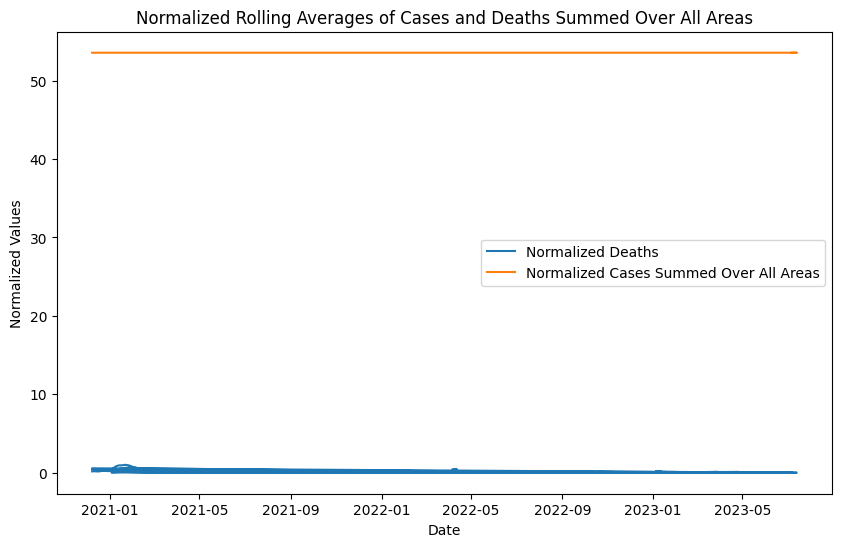

In [52]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(covid_data['date'], covid_data['daily_deaths_roll_avg_norm'], label='Normalized Deaths')
plt.plot(covid_data['date'], covid_data['daily_cases_sum_norm'], label='Normalized Cases Summed Over All Areas')

plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.title('Normalized Rolling Averages of Cases and Deaths Summed Over All Areas')
plt.legend()
plt.show()

In [53]:

#Splitting data for London and Scotland
london_df = covid_data_vaccinations_wide[covid_data_vaccinations_wide['area'] == 'London']
scotland_df = covid_data_vaccinations_wide[covid_data_vaccinations_wide['area'] == 'Scotland']

#Moulding london_df
pivoted_london_df = london_df.pivot(index='date', columns='age', values='cumVaccinationFirstDoseUptakeByVaccinationDatePercentage')
pivoted_london_df.reset_index(inplace=True)

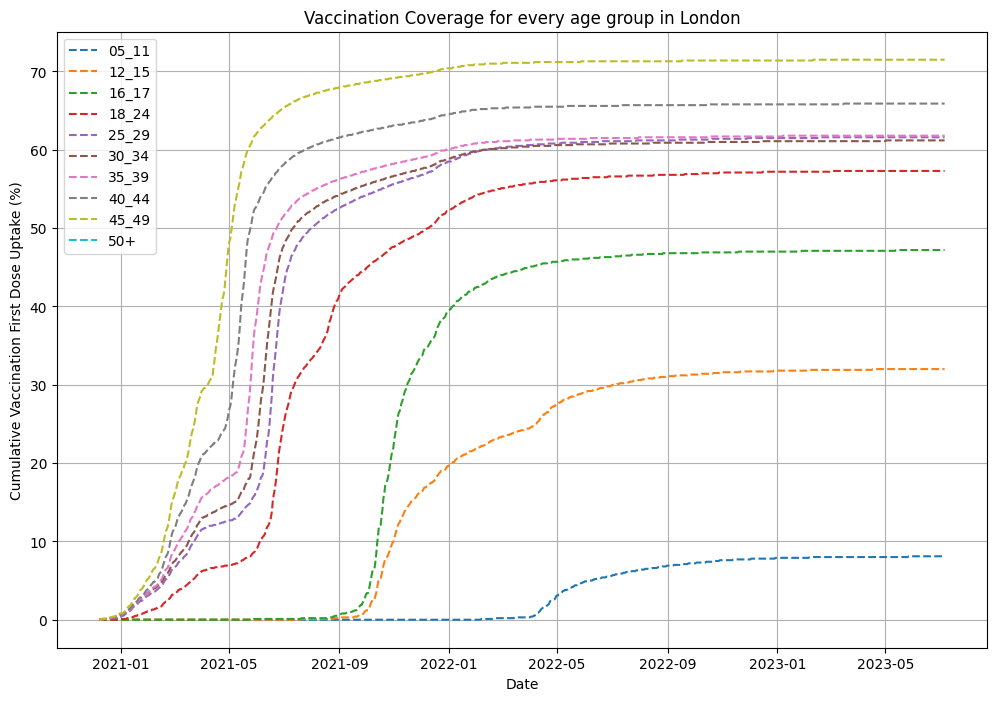

In [54]:
# Plotting
plt.figure(figsize=(12, 8))

# Loop through each age interval column and plot a line for each with dashed style
for i, age_interval in enumerate(pivoted_london_df.columns[1:11]):  # Limit to the first ten age intervals
    plt.plot(pivoted_london_df['date'], pivoted_london_df[age_interval], label=age_interval, linestyle='--')

plt.xlabel('Date')
plt.ylabel('Cumulative Vaccination First Dose Uptake (%)')
plt.title('Vaccination Coverage for every age group in London')
plt.legend()
plt.grid(True)
plt.show()